# Breast Cancer Classification

1. Load dataset: X (features), y (labels)
2. Initialize model (with random parameters: w, b)
3. Evaluate the model with a metric (e.g. BCE).
4. Calculate gradient of loss.
5. Update parameters a small step on the directions descending the gradient of loss.
6. Repeat 3 to 5 until converge.

## 1 Load Dataset

In [ ]:
from sklearn.datasets import load_breast_cancer
import numpy as np
features_raw, labels_raw = load_breast_cancer(return_X_y=True)
print(features_raw.shape, labels_raw.shape)

### 1.1 Pre-Process Dataset
1. Rescale features within range $[0, 1]$
2. Reshape arrays to 2 dimensions.

In [ ]:
features_train = features_raw / features_raw.max(axis=0)
labels_train = labels_raw.reshape(-1, 1)

# Sanity check
print(f"Training features shape: {features_train.shape}, Training labels shape: {labels_train.shape}")
print(f"Samples of training features:\n{features_train[:3]}")


## 2 Initialize Model
$$\mathbf{\hat{y}} = \sigma(\mathbf{X} \cdot \mathbf{w}^T + b) = \sigma(\mathbf{Z})$$

In [ ]:
# Define linear function
def linear(in_features, weights, bias):
    return in_features @ weights.T + bias

# Define ReLU function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Redefine forward pass. Intermediate result, Z, needs to be tracked 
def forward(in_features, weights, bias):
    out_features = linear(in_features, weights, bias)
    preds = sigmoid(out_features)
    return preds

# Sanity check
np.random.seed(123)
w_dummy = np.random.normal(loc=0, scale=0.1, size=(1, features_train.shape[1]))  # shape: (1, 30)
b_dummy = np.random.normal(0, 0.1)  # shape: scalar
preds_dummy = forward(features_train, w_dummy, b_dummy)
print(f"Samples of dummy predictions: {preds_dummy[-3:]}")
predclas_dummy = preds_dummy > 0.5
print(f"Sampels of predicted classes (dummy): {predclas_dummy[-3:]}")
accuracy = np.sum(predclas_dummy==labels_train) / labels_train.shape[0]
print(f"Dummy classification accuracy: {accuracy*100:.2f}%")
print("Practice computing other metrics, e.g., precision, recall, F1-score, etc.")

## 3 Evaluate Model with Binary Cross-Entropy Loss
$\mathcal{L}(\hat{\mathbf{y}}, \mathbf{y}) = \frac{1}{M} \sum_{i=1}^{M} -{}^{(i)}y \ln {}^{(i)}\hat{y} - (1 - {}^{(i)}y) \ln (1 - {}^{(i)}\hat{y}) = \overline{-\mathbf{y} \ln \hat{\mathbf{y}} - (1 - \mathbf{y}) \ln (1 - \hat{\mathbf{y}})}$


In [ ]:
def bce_loss(preds, labels):
    error = -labels * np.log(preds) - (1 - labels) * np.log(1 - preds)
    return np.mean(error)

# Sanity check
loss_dummy = bce_loss(preds_dummy, labels_train)
print(f"Binary cross entropy loss of the dummy model: {loss_dummy}")

## 4 Gradient Descent Model Optimization

In [17]:
def grad(in_features, preds, labels):
    dw = 1 / labels.shape[0] * (preds - labels).T @ in_features
    db = np.mean(preds - labels)
    return dw, db



## 5 Update Parameters following Gradient Descent

Initial parameters: w = [[ 3.14271995e-05 -1.32626546e-04  1.41729905e-04  8.07236535e-05
   4.54900806e-06 -2.33092061e-05 -1.19830114e-04  1.99524074e-05
   4.68439119e-05 -8.31154984e-05  1.16220405e-04 -1.09720305e-04
  -2.12310035e-04  1.03972709e-04 -4.03366038e-05 -1.26029585e-05
  -8.37516723e-05 -1.60596276e-04  1.25523737e-04 -6.88868984e-05
   1.66095249e-04  8.07308186e-05 -3.14758147e-05 -1.08590240e-04
  -7.32461987e-05 -1.21252313e-04  2.08711336e-04  1.64441230e-05
   1.15020554e-04 -1.26735205e-04]], b = 1.8103512959700387e-05
loss @ 1 iteration: 0.6931542915781066
loss @ 2 iteration: 0.6634570561745241
loss @ 3 iteration: 0.6439817256365713
loss @ 4 iteration: 0.6257564039680796
loss @ 5 iteration: 0.6086844376984637
loss @ 6 iteration: 0.5926852867522654
loss @ 7 iteration: 0.5776815336511125
loss @ 8 iteration: 0.5635996014037183
loss @ 9 iteration: 0.5503702148430745
loss @ 10 iteration: 0.5379286449197452
loss @ 11 iteration: 0.526214778677398
loss @ 12 iteration:

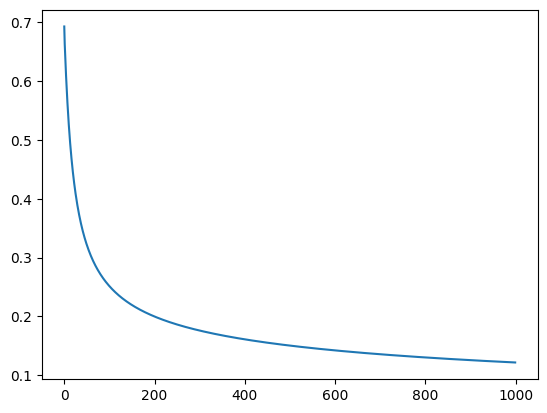

In [18]:
# Initialize parameters
w = np.random.normal(0, 1e-4, (1, features_train.shape[1])) 
b = np.random.normal(0, 1e-4)
print(f"Initial parameters: w = {w}, b = {b}")

# Set training hyperparameters
num_iters = 1000
learning_rate = 0.8
losses = []

# Gradient descent loop
for i in range(num_iters):
    preds_train = forward(features_train, w, b)
    loss = bce_loss(preds_train, labels_train)
    print(f"loss @ {i+1} iteration: {loss}")
    losses.append(loss)
    dw, db = grad(features_train, preds_train, labels_train)
    w = w - learning_rate * dw
    b = b - learning_rate * db
print(f"final parameters: w = {w}, b = {b}")

# Visualize training losses
import matplotlib.pyplot as plt
plt.plot(losses)

## Assess Training Accuracy

In [21]:
predclas_train = preds_train > 0.5
acc_train = np.sum(predclas_train==labels_train) / labels_train.shape[0]
print(f"Trained model accuracy: {acc_train}")
print(f"Samples of trained model's predictions:\n {preds_train[-3:]}")
print(f"Samples of trained model's classifications:\n {predclas_train[-3:]}")
print(f"Samples of corresponding labels:\n {labels_train[-3:]}")


Trained model accuracy: 0.9648506151142355
Samples of trained model's predictions:
 [[1.02604437e-01]
 [8.70495140e-06]
 [9.97068536e-01]]
Samples of trained model's classifications:
 [[False]
 [False]
 [ True]]
Samples of corresponding labels:
 [[0]
 [0]
 [1]]
